About dataset
Content
The water_potability.csv file contains water quality metrics for 3276 different water bodies.

1. pH value: PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness: Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS): Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines: Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate: Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity: Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon: Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes: THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity: The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability: Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.



#IMPORT LIBARRIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#IMPORT DATA SET

In [ ]:
df=pd.read_csv('/content/water_potability.csv')

#Data Prepatation and Data transformation

Information about the data set

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Check for Null Values

In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

ph,Sulfate,Trihalomethanes having Null values

Filling the Null values using fillna function and replaced the missing values with the mean value of the column

In [ ]:
df['ph'].fillna(value=df['ph'].mean(axis=0),inplace=True)

In [ ]:
df['Sulfate'].fillna(value=df['Sulfate'].mean(axis=0),inplace=True)

In [ ]:
df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].mean(axis=0),inplace=True)

In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
df.skew()

ph                 0.027796
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.041184
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.085161
Turbidity         -0.007817
Potability         0.450784
dtype: float64

Values between 0.5 to -0.5 will be considered as the normal distribution else will be skewed depending upon the skewness value

Check for Outlayers

In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


 Use boxplot to check outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0085ce2970>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0085ce2eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0085ce26d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0085cef430>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0085cef6d0>],
 'means': []}

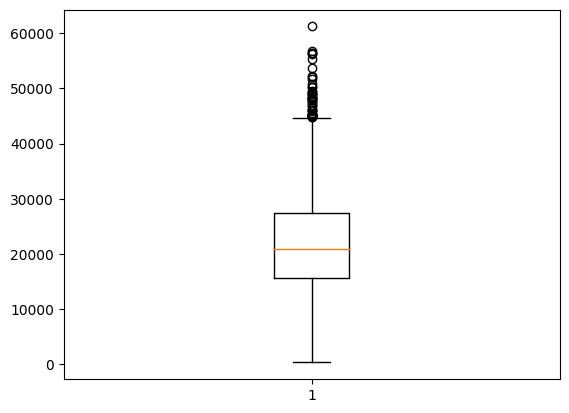

In [ ]:
plt.boxplot(df['Solids'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0085c585b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0085c58af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0085cc91f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0085c66070>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0085c66310>],
 'means': []}

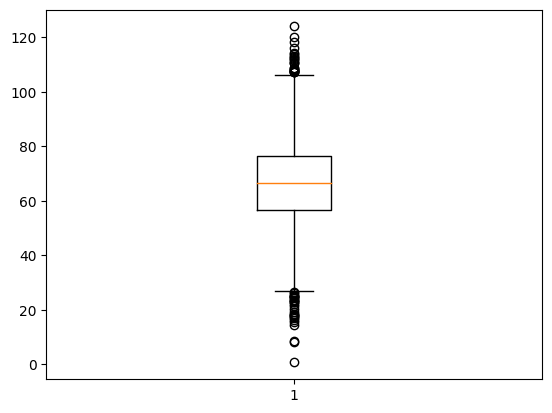

In [ ]:
plt.boxplot(df['Trihalomethanes'])

To Remove Outlayers

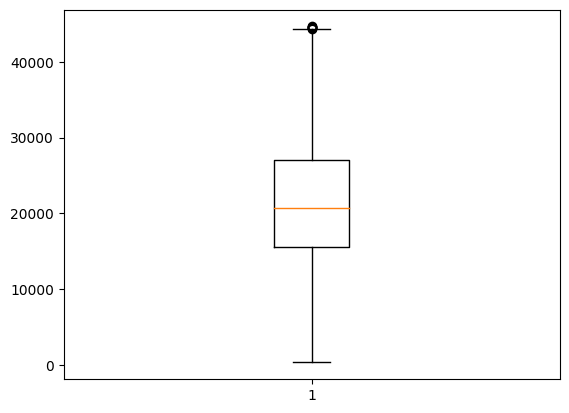

In [ ]:
Q1 = df['Solids'].quantile(0.25)
Q3 = df['Solids'].quantile(0.75)
IQR = Q3 - Q1
filt = (df['Solids'] >= Q1 - 1.5*IQR) & (df['Solids']<= Q3 + 1.5*IQR)
filtered = df.loc[filt]

plt.boxplot(filtered['Solids'])
plt.show()

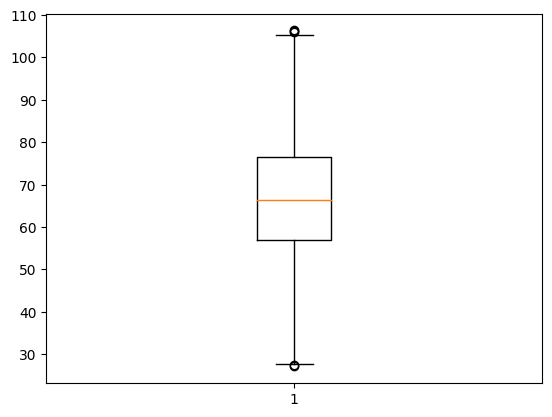

In [ ]:
Q1 = df['Trihalomethanes'].quantile(0.25)
Q3 = df['Trihalomethanes'].quantile(0.75)
IQR = Q3 - Q1
filt = (df['Trihalomethanes'] >= Q1 - 1.5*IQR) & (df['Trihalomethanes']<= Q3 + 1.5*IQR)
filtered = df.loc[filt]

plt.boxplot(filtered['Trihalomethanes'])
plt.show()

<Axes: >

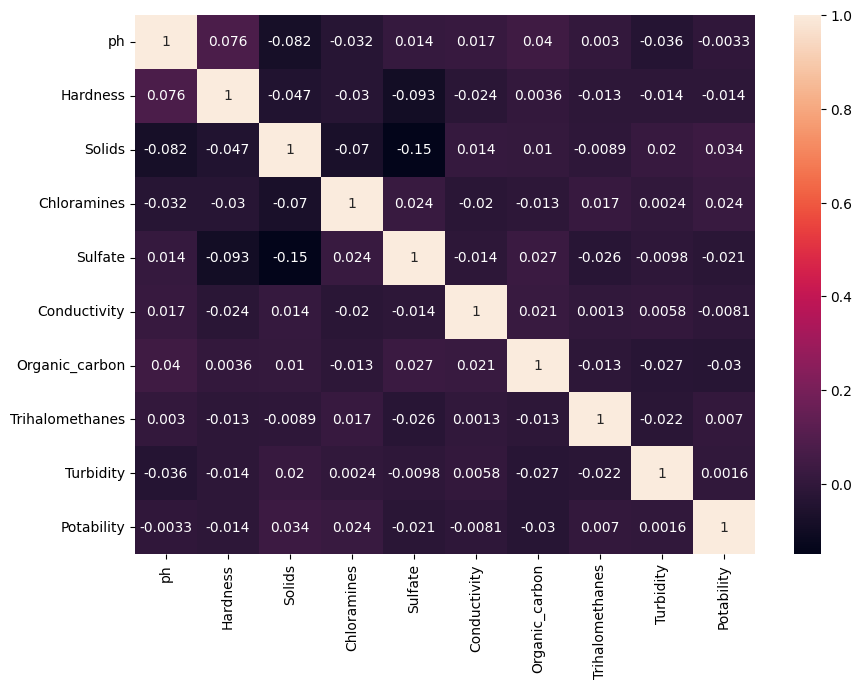

In [ ]:
corr = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True)

<Axes: >

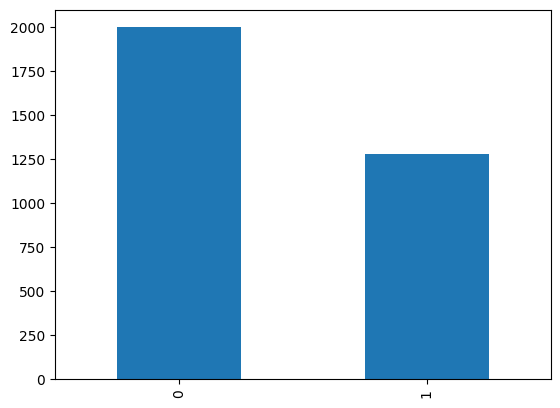

In [ ]:
df['Potability'].value_counts().plot(kind='bar')

In [ ]:
X = df.drop('Potability', axis=1)
y = df['Potability'] 
smote = SMOTE(random_state=42)
X_smote,Y_smote = smote.fit_resample(X, y)

In [ ]:
Y_smote.value_counts()

0    1998
1    1998
Name: Potability, dtype: int64

<Axes: >

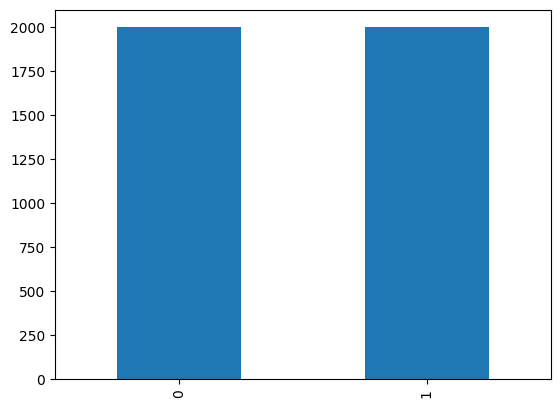

In [ ]:
Y_smote.value_counts().plot(kind='bar')

splitting data into Train data and Test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, Y_smote, test_size=0.20, random_state=42)

In [ ]:
print( X_train.shape)
print( X_test.shape)
print( y_train.shape)
print( y_test.shape)

(3196, 9)
(800, 9)
(3196,)
(800,)


User defind function for Accuracy Report 

In [ ]:
def acc_report(actual,predicted):
  acc_score = accuracy_score(actual,predicted)
  cm_matrix = confusion_matrix(actual,predicted)
  class_rep = classification_report(actual,predicted)
  print("The accuracy is ", round(acc_score,2))
  print(cm_matrix)
  print(class_rep)

LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
pred_ytrain_lr = lr.predict(X_train)
pred_ytest_lr = lr.predict(X_test) 

In [ ]:
acc_report(y_train,pred_ytrain_lr)

The accuracy is  0.51
[[876 728]
 [846 746]]
              precision    recall  f1-score   support

           0       0.51      0.55      0.53      1604
           1       0.51      0.47      0.49      1592

    accuracy                           0.51      3196
   macro avg       0.51      0.51      0.51      3196
weighted avg       0.51      0.51      0.51      3196



In [ ]:
acc_report(y_test,pred_ytest_lr)

The accuracy is  0.51
[[221 173]
 [218 188]]
              precision    recall  f1-score   support

           0       0.50      0.56      0.53       394
           1       0.52      0.46      0.49       406

    accuracy                           0.51       800
   macro avg       0.51      0.51      0.51       800
weighted avg       0.51      0.51      0.51       800



Logistic Regression model performed  with high bias and low variance

Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(n_estimators =6,max_depth=4)
rf.fit(X_train,y_train)
preds_train_rf = rf.predict(X_train)
preds_test_rf = rf.predict(X_test)

In [ ]:
acc_report(y_train,preds_train_rf)

The accuracy is  0.64
[[1089  515]
 [ 626  966]]
              precision    recall  f1-score   support

           0       0.63      0.68      0.66      1604
           1       0.65      0.61      0.63      1592

    accuracy                           0.64      3196
   macro avg       0.64      0.64      0.64      3196
weighted avg       0.64      0.64      0.64      3196



In [ ]:
acc_report(y_test,preds_test_rf)

The accuracy is  0.57
[[251 143]
 [201 205]]
              precision    recall  f1-score   support

           0       0.56      0.64      0.59       394
           1       0.59      0.50      0.54       406

    accuracy                           0.57       800
   macro avg       0.57      0.57      0.57       800
weighted avg       0.57      0.57      0.57       800



Random Forest model performed  with high bias and low variance

Decision Tree Classifier

In [ ]:
dtree = DecisionTreeClassifier(max_depth =4,min_samples_split = 4)
dtree.fit(X_train,y_train)
preds_train_dt = dtree.predict(X_train)
preds_test_dt = dtree.predict(X_test)

In [ ]:
acc_report(y_train,preds_train_dt)

The accuracy is  0.61
[[1192  412]
 [ 840  752]]
              precision    recall  f1-score   support

           0       0.59      0.74      0.66      1604
           1       0.65      0.47      0.55      1592

    accuracy                           0.61      3196
   macro avg       0.62      0.61      0.60      3196
weighted avg       0.62      0.61      0.60      3196



In [ ]:
acc_report(y_test,preds_test_dt)

The accuracy is  0.56
[[279 115]
 [239 167]]
              precision    recall  f1-score   support

           0       0.54      0.71      0.61       394
           1       0.59      0.41      0.49       406

    accuracy                           0.56       800
   macro avg       0.57      0.56      0.55       800
weighted avg       0.57      0.56      0.55       800



Decision Tree model performed  with high bias and low variance

AdaBoost Classifier


In [ ]:
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4), n_estimators=4, random_state=42)
ada_clf.fit(X_train, y_train)
pred_train_adb= ada_clf.predict(X_train)
pred_test_adb = ada_clf.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
acc_report(y_train,pred_train_adb)

The accuracy is  0.69
[[1188  416]
 [ 567 1025]]
              precision    recall  f1-score   support

           0       0.68      0.74      0.71      1604
           1       0.71      0.64      0.68      1592

    accuracy                           0.69      3196
   macro avg       0.69      0.69      0.69      3196
weighted avg       0.69      0.69      0.69      3196



In [ ]:
acc_report(y_test,pred_test_adb)

The accuracy is  0.67
[[267 127]
 [140 266]]
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       394
           1       0.68      0.66      0.67       406

    accuracy                           0.67       800
   macro avg       0.67      0.67      0.67       800
weighted avg       0.67      0.67      0.67       800



AdaBoost model performed with high bias and low variance

 XG Boost Classifier

In [ ]:
xgb = XGBClassifier(se_estimator=DecisionTreeClassifier(max_depth=4), n_estimators=7,randamstate=42)
xgb.fit(X_train, y_train)
y_pred_train_xgb = xgb.predict(X_train)
y_pred_test_xgb = xgb.predict(X_test)

[11:31:56] WARNING: ../src/learner.cc:767: 
Parameters: { "randamstate", "se_estimator" } are not used.



In [ ]:
acc_report(y_train,y_pred_train_xgb)

The accuracy is  0.77
[[1270  334]
 [ 399 1193]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.78      1604
           1       0.78      0.75      0.76      1592

    accuracy                           0.77      3196
   macro avg       0.77      0.77      0.77      3196
weighted avg       0.77      0.77      0.77      3196



In [ ]:
acc_report(y_test,y_pred_test_xgb)


The accuracy is  0.66
[[259 135]
 [139 267]]
              precision    recall  f1-score   support

           0       0.65      0.66      0.65       394
           1       0.66      0.66      0.66       406

    accuracy                           0.66       800
   macro avg       0.66      0.66      0.66       800
weighted avg       0.66      0.66      0.66       800



XG Boost performed with high bias and high variance

KNN Classifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=57)
knn.fit(X_train,y_train)
preds_ytrain_knn=knn.predict(X_train)
preds_ytest_knn=knn.predict(X_test)

In [ ]:
acc_report(y_train,preds_ytrain_knn)


The accuracy is  0.56
[[958 646]
 [764 828]]
              precision    recall  f1-score   support

           0       0.56      0.60      0.58      1604
           1       0.56      0.52      0.54      1592

    accuracy                           0.56      3196
   macro avg       0.56      0.56      0.56      3196
weighted avg       0.56      0.56      0.56      3196



In [ ]:
acc_report(y_test,preds_ytest_knn)

The accuracy is  0.51
[[225 169]
 [225 181]]
              precision    recall  f1-score   support

           0       0.50      0.57      0.53       394
           1       0.52      0.45      0.48       406

    accuracy                           0.51       800
   macro avg       0.51      0.51      0.51       800
weighted avg       0.51      0.51      0.51       800



KNN performed with high bias and low variance

Naive Bayes GaussianNB

In [ ]:
gb=GaussianNB()
gb.fit(X_train,y_train)
preds_train_gb=gb.predict(X_train)
preds_test_gb=gb.predict(X_test)

In [ ]:
acc_report(y_train,preds_train_gb)

The accuracy is  0.56
[[1001  603]
 [ 791  801]]
              precision    recall  f1-score   support

           0       0.56      0.62      0.59      1604
           1       0.57      0.50      0.53      1592

    accuracy                           0.56      3196
   macro avg       0.56      0.56      0.56      3196
weighted avg       0.56      0.56      0.56      3196



In [ ]:
acc_report(y_test,preds_test_gb)

The accuracy is  0.54
[[241 153]
 [219 187]]
              precision    recall  f1-score   support

           0       0.52      0.61      0.56       394
           1       0.55      0.46      0.50       406

    accuracy                           0.54       800
   macro avg       0.54      0.54      0.53       800
weighted avg       0.54      0.54      0.53       800



The performed with high bias and low variance

Support Vector Machines (SVM)

In [ ]:
svc=SVC(kernel='rbf',degree=4)
svc.fit(X_train,y_train)
svc_preds_train=svc.predict(X_train)
svc_preds_test=svc.predict(X_test)

In [ ]:
acc_report(y_train,svc_preds_train)

The accuracy is  0.52
[[1271  333]
 [1214  378]]
              precision    recall  f1-score   support

           0       0.51      0.79      0.62      1604
           1       0.53      0.24      0.33      1592

    accuracy                           0.52      3196
   macro avg       0.52      0.51      0.47      3196
weighted avg       0.52      0.52      0.48      3196



In [ ]:
acc_report(y_test,svc_preds_test)

The accuracy is  0.52
[[321  73]
 [314  92]]
              precision    recall  f1-score   support

           0       0.51      0.81      0.62       394
           1       0.56      0.23      0.32       406

    accuracy                           0.52       800
   macro avg       0.53      0.52      0.47       800
weighted avg       0.53      0.52      0.47       800



SVM performed with high bias and low variance

Comparison of Classification Models: All models has High bias it is not good, compare to other model AdaBoost had the highest accuracy of 0.69, with precision, recall, and F1-score values of 0.71, 0.74, and 0.71, respectively. The second-best model was Naive Bayes, with an accuracy of 56 and precision, recall, and F1-score values of 0.56, 062, and 0.59.   In general, AdaBoost was the best-performing model, producing the highest accuracy and the highest precision, recall, and F1-score values compare to other models. 